In [1]:
# code for implementing Random Forest Regressor and LinearSVR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
# reading in COVID-19 datasets
dem_df = pd.read_csv('../data/demographics.csv')
eco_df = pd.read_csv('../data/economy.csv')
epi_df = pd.read_csv('../data/epidemiology.csv')
vac_df = pd.read_csv('../data/vaccinations.csv')
idx_df = pd.read_csv('../data/index.csv')

In [3]:
# viewing datasets
dem_df.head(3)

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0


In [4]:
eco_df.head(3)

,location_key,gdp_usd,gdp_per_capita_usd,human_capital_index
0,AD,3.154058e+09,40886.0,NaN
1,AE,4.211423e+11,43103.0,0.659
2,AF,1.910135e+10,502.0,0.389


In [5]:
epi_df.head(3)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [6]:
vac_df.head(3)

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
idx_df.head(3)

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0


In [8]:
idx_df[['country_name']]

,country_name
0,Andorra
1,United Arab Emirates
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
22958,South Africa
22959,South Africa
22960,South Africa
22961,Zambia


In [9]:
idx_df.loc[idx_df['country_name'] == 'United States of America']

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
19557,US,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,US,USA,0
19558,US_AK,ChIJG8CuwJzfAFQRNduKqSde27w,Q797,geoId/02,US,United States of America,AK,Alaska,NaN,NaN,NaN,NaN,US,USA,1
19559,US_AK_02013,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,AK,Alaska,02013,Aleutians East,NaN,NaN,US,USA,2
19560,US_AK_02016,ChIJI9ivbI1Pg1cRg8d4nlGjGVU,Q185533,geoId/02016,US,United States of America,AK,Alaska,02016,Aleutians West,NaN,NaN,US,USA,2
19561,US_AK_02020,ChIJQT-zBHaRyFYR42iEp1q6fSU,Q39450,geoId/02020,US,United States of America,AK,Alaska,02020,Anchorage Municipality,NaN,NaN,US,USA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22837,US_WY_56037,ChIJEVZf4rRTWocRoqATF0f_rnA,Q484194,geoId/56037,US,United States of America,WY,Wyoming,56037,Sweetwater County,NaN,NaN,US,USA,2
22838,US_WY_56039,ChIJV3wGpVVrUlMR3m18oGf5rvk,Q488912,geoId/56039,US,United States of America,WY,Wyoming,56039,Teton County,NaN,NaN,US,USA,2
22839,US_WY_56041,ChIJR4w4T5CnUYcRvTPRgMmXumM,Q483973,geoId/56041,US,United States of America,WY,Wyoming,56041,Uinta County,NaN,NaN,US,USA,2
22840,US_WY_56043,ChIJIXR5_L9BS1MRLvs8KUxeZC8,Q112846,geoId/56043,US,United States of America,WY,Wyoming,56043,Washakie County,NaN,NaN,US,USA,2


In [10]:
# get the US data
us_epi_df = epi_df.loc[epi_df['location_key'] == 'US']
us_vac_df = vac_df.loc[vac_df['location_key'] == 'US']

In [11]:
us_ev_df = us_epi_df.merge(us_vac_df, on='date', how='inner')
us_ev_df

,date,location_key_x,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2020-12-13,US,177830.0,2021.0,NaN,1495092.0,16119805.0,287276.0,NaN,228772064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-14,US,195630.0,1996.0,NaN,1946701.0,16315435.0,289272.0,NaN,230718765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-15,US,197440.0,2724.0,NaN,2078178.0,16512875.0,291996.0,NaN,232796943.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-16,US,237037.0,3374.0,NaN,2053475.0,16749912.0,295370.0,NaN,234850418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-17,US,242528.0,3316.0,NaN,2022937.0,16992440.0,298686.0,NaN,236873355.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2022-09-10,US,19715.0,51.0,NaN,NaN,92225201.0,1003766.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
637,2022-09-11,US,16742.0,10.0,NaN,NaN,92241943.0,1003776.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
638,2022-09-12,US,60728.0,213.0,NaN,NaN,92302671.0,1003989.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN
639,2022-09-13,US,54413.0,460.0,NaN,NaN,92357092.0,1004449.0,NaN,NaN,...,0.0,17094523.0,0.0,18881650.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# convert data to sliding window and converting to numpy array

cases = pd.DataFrame(us_ev_df['new_confirmed'])
cols = list()
cols.append(cases.shift(1))
cols.append(cases)
cases_new = pd.concat(cols, axis=1)
cases_new = cases_new.set_axis(['before', 'after'], axis=1)
cases_new = cases_new.tail(-1)
cases_sw = np.array(cases_new)
cases_new

,before,after
1,177830.0,195630.0
2,195630.0,197440.0
3,197440.0,237037.0
4,237037.0,242528.0
5,242528.0,233736.0
...,...,...
636,81861.0,19715.0
637,19715.0,16742.0
638,16742.0,60728.0
639,60728.0,54413.0


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR

# function update_model trains a Random Forest Regressor using the input training dataset
# it returns the predicted value given the test point X value
def update_model(train, testX): 
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(train[:, :-1], train[:, -1])
    y_pred = model.predict([testX])
    return y_pred[0]

# function update_model trains a LinearSVR using the input training dataset
# it returns the predicted value given the test point X value
def update_svm(train, testX):
    model = LinearSVR(max_iter=100000)
    model.fit(train[:, :-1], train[:, -1])
    y_pred = model.predict([testX])
    return y_pred[0]

# this function splits the data into train and test based on the input index n_test
def train_test_split(data, n_test):
 return data[:-n_test, :], data[-n_test:, :]


3110938582.9781075


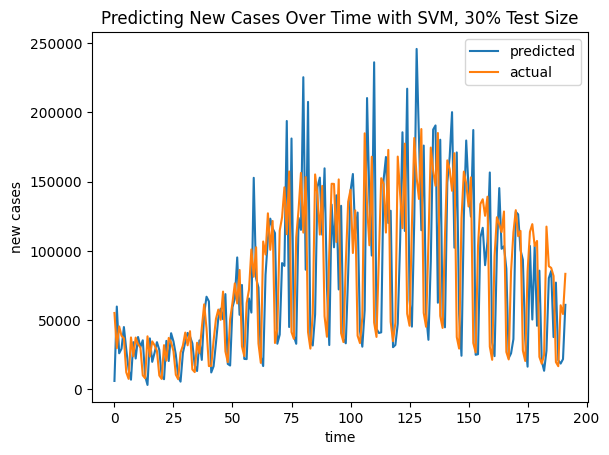

In [42]:
import warnings
warnings.filterwarnings("ignore")

# code to train a LinearSVR with a single train-test split
cases_sw = np.array(cases_new)
train, test = train_test_split(cases_sw, int(0.30*len(cases_sw))) # 70-30 train-test
pred = list()

# for each point in the test set, make a prediction based on a trained model
# then add the point to the training set and repeat
for i in range(len(test)):
    y_pred = update_svm(train, test[i, :-1])
    pred.append(y_pred)
    train = np.vstack([train, test[i]])

mse = mean_squared_error(test[:, -1], pred)
print(mse)

plt.plot(range(len(pred)), pred, label='predicted')
plt.plot(range(len(test)), test[:, -1], label='actual')
plt.xlabel('time')
plt.ylabel('new cases')
plt.title('Predicting New Cases Over Time with SVM, 30% Test Size')
plt.legend()
plt.show()

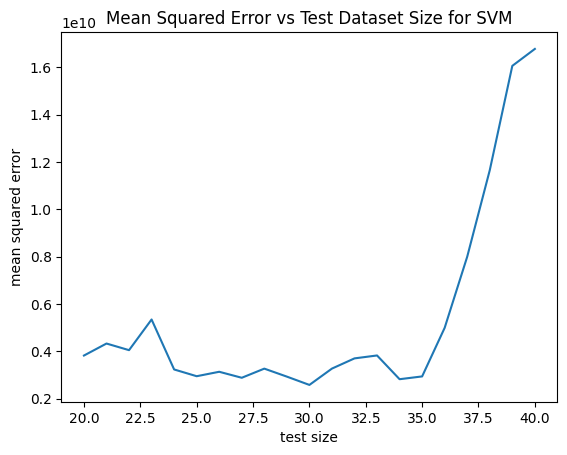

In [41]:
import warnings
warnings.filterwarnings("ignore")


cases_sw = np.array(cases_new)
error = list()

# same code except the outer loop increases the test split by 1% each iteration
for size in range(21):
    train, test = train_test_split(cases_sw, int((0.2+size/100) * len(cases_sw)))
    pred = list()
    for i in range(len(test)):
        y_pred = update_svm(train, test[i, :-1])
        pred.append(y_pred)
        train = np.vstack([train, test[i]])
    mse = mean_squared_error(test[:, -1], pred)
    error.append(mse)

# plot compares mean squared error 
plt.plot(range(20, 41, 1), error)
plt.xlabel('test size')
plt.ylabel('mean squared error')
plt.title('Mean Squared Error vs Test Dataset Size for SVM')
plt.show()

2864141505.112668


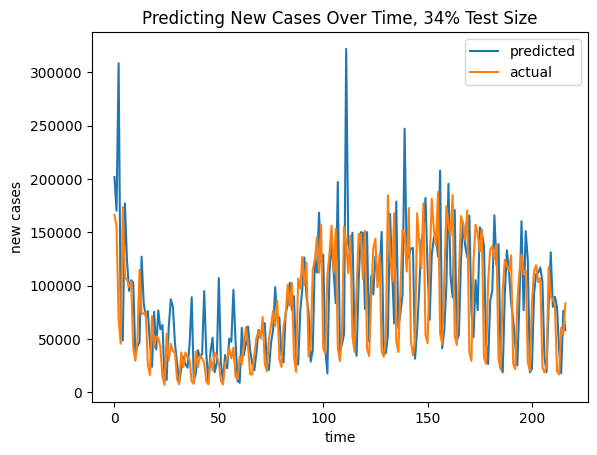

In [27]:
# same code for single train-test split but for Random Forest Regressor

cases_sw = np.array(cases_new)
train, test = train_test_split(cases_sw, int(0.34*len(cases_sw)))
pred = list()
for i in range(len(test)):
    y_pred = update_model(train, test[i, :-1])
    pred.append(y_pred)
    train = np.vstack([train, test[i]])
mse = mean_squared_error(test[:, -1], pred)
print(mse)

plt.plot(range(len(pred)), pred, label='predicted')
plt.plot(range(len(test)), test[:, -1], label='actual')
plt.xlabel('time')
plt.ylabel('new cases')
plt.title('Predicting New Cases Over Time, 34% Test Size')
plt.legend()
plt.show()

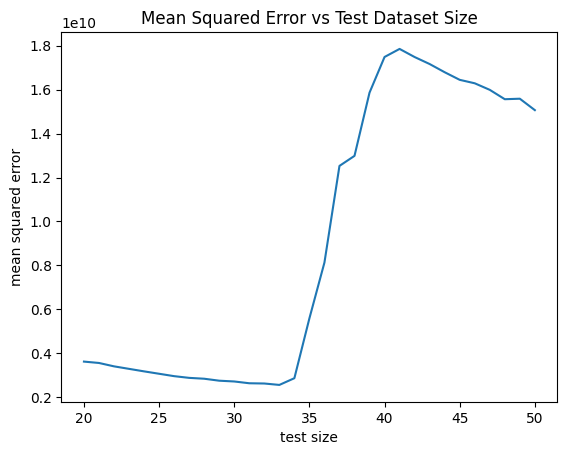

In [26]:
# same code for multiple train-test splits but for Random Forest Regressor

cases_sw = np.array(cases_new)
error = list()
for i in range(31):
    train, test = train_test_split(cases_sw, int((0.2+i/100) * len(cases_sw)))
    pred = list()
    for i in range(len(test)):
        y_pred = update_model(train, test[i, :-1])
        pred.append(y_pred)
        train = np.vstack([train, test[i]])
    mse = mean_squared_error(test[:, -1], pred)
    error.append(mse)

plt.plot(range(20, 51, 1), error)
plt.xlabel('test size')
plt.ylabel('mean squared error')
plt.title('Mean Squared Error vs Test Dataset Size')
plt.show()